In [2]:
from abtem.waves import Probe

In [3]:
def plot_probe_profile(probe,defocus_low,defocus_up,num):
    gpts=probe.gpts[1]
    sampling=probe.sampling
    ctf=probe.ctf
    semiangle_cutoff=probe.ctf.semiangle_cutoff
    
    res=np.zeros((num,gpts))
    
    gpts_f=int(semiangle_cutoff*2/probe.angular_sampling[0])*2
    res_f=np.zeros((num,gpts_f))
    for idx,defocus in enumerate(np.linspace(defocus_low,defocus_up,num)):
        ctf.defocus=defocus
        pr=Probe(energy=probe.energy,semiangle_cutoff=semiangle_cutoff,sampling=sampling,ctf=ctf,gpts=gpts)
        pr_proj=np.sum(np.abs(pr.build().array)**2,0)
        res[idx]=pr_proj

    return (res)

In [4]:
from abtem.utils import energy2wavelength

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from abtem.custom import incoherent_probe,get_probe_radius

In [6]:
energy=22e3
semiangle_cutoff=8*np.sqrt(2)

px_size = 56e-6
px_num = 256#
camera_length = 240e-3
angular_sampling = px_size/camera_length*1e3 # in mrad
angular_extent = angular_sampling * px_num/2  # only semi angle
calc_fov = 1/(angular_sampling*1e-3*1/energy2wavelength(energy))

min r: 2.602686791605746 nm


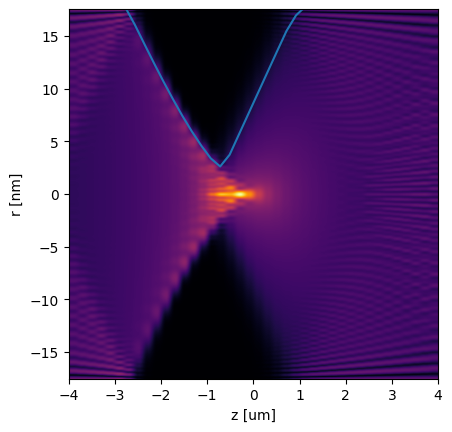

In [50]:
probe=Probe(energy=energy,semiangle_cutoff=semiangle_cutoff,gpts=512,extent=calc_fov,C30=10e-3/1e-10)
defocus_low=-40000;
defocus_up=40000
asdf=plot_probe_profile(probe,defocus_low,defocus_up,40)#,norm=matplotlib.colors.LogNorm())


num=40
line=np.zeros(num)
defocuses=np.linspace(defocus_low,defocus_up,num)
for i in range(num):
    probe_dummy = probe.copy()
    probe_dummy.ctf.defocus=defocuses[i]
    incoh_probe=incoherent_probe(probe_dummy,temporal_sigma=0,spatial_sigma=0)
    r, _, _, _= get_probe_radius(probe_measurement=incoh_probe,current_ratio=0.90)
    line[i]=r

plt.plot(-defocuses/1e4,line/10)

plt.imshow(asdf[::-1,::].T**0.5,extent=(-defocus_up/1e4,-defocus_low/1e4,-probe.extent[0]/10/2,probe.extent[0]/10/2),aspect=(defocus_up-defocus_low)/1e4/(probe.extent[0]/10),cmap="inferno")
plt.xlabel(r"z [um]")
plt.ylabel(r"r [nm]")
print("min r:",np.min(line)/10,"nm")

In [88]:
50
3: 0.88
4: 0.64
5: 0.5
6: 0.40
7: 0.35
8: 0.30
9: 0.39
10: 0.7

SyntaxError: illegal target for annotation (3436313050.py, line 2)

In [55]:
1: 6
3: 1.58
4: 1.17
5: 0.9
6: 1.126
7: 1.15
8: 1.13
9: 1.4
10: 1.85
12: 3.04

SyntaxError: illegal target for annotation (225544319.py, line 1)

In [7]:
calc_fov

350.6133096112855

In [ ]:
line

(<Axes: xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x7fd1a1947370>)

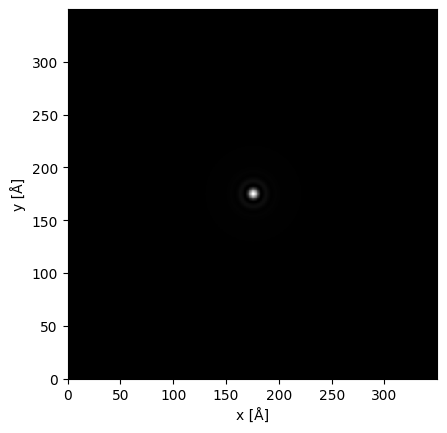

In [46]:
Probe(energy=energy,semiangle_cutoff=11,gpts=512,extent=calc_fov,C30=C30,defocus=4000).show()

In [ ]:
defocuses/1e4

In [49]:
from scipy.optimize import minimize

In [69]:
np.random.randint(256,512,size=2)

array([321, 276])

In [79]:
(np.random.randint(256,512),)*2

(485, 485)